In [7]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date

#**Step 1: High level data analysis**
Objectives:
* Understanding how different channels behave
* Discerning how different channels perform
* Having a sense of what the viewer base is like in terms of degree and variation of engagement

In [8]:
channel_df = pd.read_csv('/content/channel.csv')
video_df = pd.read_csv('/content/video.csv')

**Understanding the extremes**

In [9]:
channel_df = channel_df.sort_values('subscribers', ascending = False)
channel_df

,channelName,subscribers,views,totalVideos,playlistId,country,foundingdate
1,Nathan Florence,427000,183617743,478,UU6uX6GF5q2JxLjMkyivM2Og,US,2013-10
2,Nic Von Rupp,349000,10414827,375,UUnDcnuhRMNxsI14ZnwIh6fQ,PT,2018-01
9,Red Bull Surfing,289000,132912602,970,UU--3c8RqSfAqYBdDjIG3UNA,AT,2019-02
8,Surfline,253000,115020633,2820,UU4i3-yfVazfuqwoz71T79Sw,US,2006-06
10,Kale Brock,204000,31626184,447,UULdPicN16eAKPKir8EY1UXQ,nothing,2012-07
3,Barefoot Surf,195000,21716221,150,UUvOh9i-BOFzu51rpj33fGag,nothing,2012-12
7,Rip Curl,147000,50583492,2381,UUM7nkBGadxKOa4DAJVFwoWg,nothing,2005-10
0,How to Rip,141000,17722770,209,UUuZSTHZf3vd7eVehhnotcsg,nothing,2014-12
4,Kai Lenny,141000,40403333,184,UUmzxts0YGES5tN-oJ9abTQg,US,2010-02
5,Surf Strength Coach,59300,4748696,284,UUCNZ9zfcszWw_LErqxhuT3g,US,2010-09


In [10]:
def calculate_age(born):
  born = dt.strptime(born, "%Y-%m").date()
  today = date.today()
  return today.year - born.year - ((today.month) < (born.month))

In [11]:
channel_df['age'] = channel_df['foundingdate'].apply(calculate_age)

In [12]:
youngest_channel = channel_df.loc[channel_df['age'] == channel_df['age'].min(), 'channelName'].item()
oldest_channel = channel_df.loc[channel_df['age'] == channel_df['age'].max(), 'channelName'].item()

print('Youngest channel: '+ youngest_channel+ ' at '+ str(channel_df['age'].min())+ ' years.')
print('Oldest channel: '+ oldest_channel + ' at ' + str(channel_df['age'].max()) + ' years.')

Youngest channel: Red Bull Surfing at 5 years.
Oldest channel: Rip Curl at 18 years.


In [13]:
columns_of_interest = ['subscribers', 'views', 'totalVideos']

for i in columns_of_interest:
  j = channel_df.loc[channel_df[i] == channel_df[i].max(), 'channelName'].item()
  k = channel_df.loc[channel_df['channelName'] == j, 'age'].item()
  print(f'Highest number of ' + i + ': ' + j + ', age: ' + str(k))

Highest number of subscribers: Nathan Florence, age: 10
Highest number of views: Nathan Florence, age: 10
Highest number of totalVideos: Surfline, age: 17


**Conclusion**: Popularity of the channel has little to do with how long the channel has existed and the number of videos it has posted.

## **Exploring what the aggregate numbers tell us**

In [14]:
channel_review = video_df.groupby(['channelTitle']).agg({'video_id': ['count'], 'video_length': ['mean','std'], 'viewCount':['mean','std'], 'likeCount': ['mean','std'], 'commentCount': ['mean','std']}).reset_index().round(2)
channel_review.reset_index(inplace=True)
channel_review.columns = channel_review.columns.droplevel(1)
channel_review.columns = ['index', 'channel', 'totalVideos', 'duration_mean','duration_std', 'view_mean', 'view_std', 'like_mean', 'like_std', 'comment_mean', 'comment_std']
channel_review = channel_review.drop('index', axis=1)
channel_review

,channel,totalVideos,duration_mean,duration_std,view_mean,view_std,like_mean,like_std,comment_mean,comment_std
0,Barefoot Surf,150,1.97,3.17,144805.03,481980.76,3643.39,13793.99,42.89,139.52
1,How to Rip,209,6.93,5.24,84801.94,278872.05,1350.41,4077.33,74.30,161.97
2,Kai Lenny,184,6.57,4.99,219634.14,849623.00,2800.41,8414.05,152.30,450.86
3,Kale Brock,448,7.41,8.83,70608.13,161791.06,1352.94,2914.65,75.89,137.21
4,Nathan Florence,479,11.92,11.11,383443.80,2398351.99,8408.23,57464.06,318.81,1346.77
5,Nic Von Rupp,375,2.36,4.06,27778.83,73790.09,526.19,2116.25,28.63,75.91
6,Ombe Surf,527,15.79,24.51,8793.07,22719.52,170.24,405.41,13.03,30.39
7,Red Bull Surfing,970,8.47,36.88,137036.28,555948.98,1123.96,3836.47,38.71,97.54
8,Rip Curl,2377,4.32,33.48,21020.66,74231.46,103.76,423.43,4.92,21.09
9,Surf Strength Coach,284,7.78,11.85,16776.46,44177.62,233.77,726.00,13.07,34.82


In [15]:
channel_review['duration'] = channel_review['duration_std'] / channel_review['duration_mean']
channel_review['view'] = channel_review['view_std'] / channel_review['view_mean']
channel_review['like'] = channel_review['like_std'] / channel_review['like_mean']
channel_review['commment'] = channel_review['comment_std'] / channel_review['comment_mean']

In [16]:
channel_review.round()

,channel,totalVideos,duration_mean,duration_std,view_mean,view_std,like_mean,like_std,comment_mean,comment_std,duration,view,like,commment
0,Barefoot Surf,150,2.0,3.0,144805.0,481981.0,3643.0,13794.0,43.0,140.0,2.0,3.0,4.0,3.0
1,How to Rip,209,7.0,5.0,84802.0,278872.0,1350.0,4077.0,74.0,162.0,1.0,3.0,3.0,2.0
2,Kai Lenny,184,7.0,5.0,219634.0,849623.0,2800.0,8414.0,152.0,451.0,1.0,4.0,3.0,3.0
3,Kale Brock,448,7.0,9.0,70608.0,161791.0,1353.0,2915.0,76.0,137.0,1.0,2.0,2.0,2.0
4,Nathan Florence,479,12.0,11.0,383444.0,2398352.0,8408.0,57464.0,319.0,1347.0,1.0,6.0,7.0,4.0
5,Nic Von Rupp,375,2.0,4.0,27779.0,73790.0,526.0,2116.0,29.0,76.0,2.0,3.0,4.0,3.0
6,Ombe Surf,527,16.0,25.0,8793.0,22720.0,170.0,405.0,13.0,30.0,2.0,3.0,2.0,2.0
7,Red Bull Surfing,970,8.0,37.0,137036.0,555949.0,1124.0,3836.0,39.0,98.0,4.0,4.0,3.0,3.0
8,Rip Curl,2377,4.0,33.0,21021.0,74231.0,104.0,423.0,5.0,21.0,8.0,4.0,4.0,4.0
9,Surf Strength Coach,284,8.0,12.0,16776.0,44178.0,234.0,726.0,13.0,35.0,2.0,3.0,3.0,3.0


**Conclusion**:

* Nathan Florence's channel is cumulatively speaking on a monthly basis, the most viewed, liked and commented on.
* Kai Lenny, Kale Brock, Nathan Florence and How to Rip) seem to have a much lower level of variation in the duration of their videos relative to the other channels. Ripcurl followed by Surfline has the most variation. These channels also produce a large volume of videos (probably for a variety of purposes)

* There is a great deal of variation in terms of viewership behavior:
> * Kale Brock has a highly consistent number of views. In stark contrast, Surfline and Nathan Florence have much more variation by order of magnitude (at least 3X more). This is interesting, in particular, for Nathan Florence given that he is rather consistent in posting videos.
> * Similarly, Kale Brock and OMBE have a consistent number of likes on their videos. Again, Surfline and Nathan Florence have much more variation on their channel. This time with Surfline's channel havinng about 8X the amount of variation.
> * Again, Kale Brock, OMBE and How to Rip have much less variation in comment. Surfline and Nathan Florence's channel are very much different.

* 2 factors are consistent between the channels with the most consistency.
>* They are Australian
>* They are instructional
* This information is aggregated based on channel. More granular analysis would be useful.




### **Miscellaneous: Exploring Timing in the Posts**

In [17]:
day_df = video_df.groupby(['day'])['video_id'].count().to_frame()
day_df

,video_id
day,
Friday,1288
Monday,1689
Saturday,678
Sunday,624
Thursday,1553
Tuesday,1562
Wednesday,1427


In [18]:
video_df.groupby(['channelTitle','day'])['video_id'].count().to_frame()

video_id
channelTitle  day                
Barefoot Surf Friday           22
              Monday           28
              Saturday         16
              Sunday           15
              Thursday         24
...                           ...
Surfline      Saturday        231
              Sunday          128
              Thursday        478
              Tuesday         559
              Wednesday       448

[77 rows x 1 columns]

**Conclusion:** Weekdays, particularly Monday and Tuesday seem like popular days for posting content for most channels.

In [19]:
month_df = video_df.groupby(['month'])['video_id'].count().to_frame().reset_index()
month_df.reset_index(inplace=True)
month_df = month_df.drop('index', axis = 1)
month_df.columns = ['month','tot_vids']

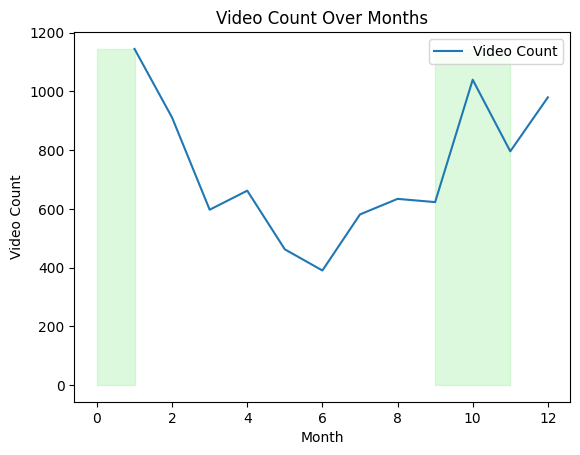

In [20]:
import matplotlib.pyplot as plt

# Plotting a line chart
plt.plot(month_df['month'], month_df['tot_vids'], label='Video Count')

# Adding a light green translucent rectangle behind months 1, 10, 11, and 12
plt.fill_betweenx(y=[0, month_df['tot_vids'].max()],
                  x1=0, x2=1, color='lightgreen', alpha=0.3)
plt.fill_betweenx(y=[0, month_df['tot_vids'].max()],
                  x1=9, x2=11, color='lightgreen', alpha=0.3)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Video Count')
plt.title('Video Count Over Months')

# Adding legend
plt.legend()

# Display the plot
plt.show()

**Conclusion:** The Winter Months in the Northern Hemisphere seem like particularly high activity months for these surf-Youtube channels.

In [21]:
timeseries_df = video_df.groupby(['channelTitle','month_year']).agg({'video_id': 'count', 'video_length': 'mean', 'viewCount': 'mean', 'likeCount': 'mean', 'commentCount': 'mean'}).reset_index()
timeseries_df = timeseries_df.round(2)
timeseries_df.columns = ['channel', 'month_year', 'tot_vids', 'ave_duration', 'ave_views', 'ave_likes', 'ave_comments']

In [22]:
timeseries_df

,channel,month_year,tot_vids,ave_duration,ave_views,ave_likes,ave_comments
0,Barefoot Surf,2015-05,1,0.30,4122.00,21.00,1.00
1,Barefoot Surf,2017-07,1,1.83,9799.00,102.00,3.00
2,Barefoot Surf,2018-02,1,4.08,1681040.00,36254.00,464.00
3,Barefoot Surf,2018-03,1,8.32,2618298.00,58323.00,758.00
4,Barefoot Surf,2018-07,1,7.78,1040864.00,20192.00,736.00
...,...,...,...,...,...,...,...
943,Surfline,2023-10,11,26.01,27980.18,339.36,14.00
944,Surfline,2023-11,3,41.89,34550.33,514.67,16.00
945,Surfline,2023-12,6,30.80,74161.50,860.50,29.83
946,Surfline,2024-01,17,101.46,618742.35,18355.29,222.47


In [23]:
channel_stats = timeseries_df.groupby(['channel']).agg({'month_year':['min', 'max'], 'tot_vids':['mean', 'std', 'min', 'max']}).round(2).reset_index()
channel_stats

channel month_year          tot_vids                
                               min      max     mean    std min  max
0         Barefoot Surf    2015-05  2024-01     3.57   3.40   1   14
1            How to Rip    2014-12  2024-02     2.99   2.12   1    9
2             Kai Lenny    2016-04  2024-02     3.07   2.04   1   11
3            Kale Brock    2012-11  2024-02     5.67   4.57   1   24
4       Nathan Florence    2018-07  2024-02     7.85   4.68   1   28
5          Nic Von Rupp    2019-06  2024-02     8.72  15.54   1   68
6             Ombe Surf    2017-01  2024-02    11.98   9.83   1   40
7      Red Bull Surfing    2008-07  2024-02     7.52   9.07   1   45
8              Rip Curl    2010-06  2024-01    14.67  19.68   1  179
9   Surf Strength Coach    2011-03  2024-02     2.90   2.00   1    9
10             Surfline    2007-11  2024-02    17.61  24.82   1  156

**Conclusion**: Some channels were created long before the owners started posting videos. Considering that most of the channels posted videos in the past month or so, all of them are active. Founding date has little impact on the popularity of the channel and the level of engagement of viewers / subscribers.

**Hypothesis**: Consistency of videos is a critical factor affecting user engagement.

**Steps:** Establish a baseline understanding of how each channel posts videos. Consider factors related to content and frequency.

**Consideration** Having a large viewer / commmentor base and the degree of viewer engagement is something to explore

# **Step 4: Examine frequency of videos posted (time series analysis)**

In [24]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Convert 'month_year' column to datetime format
timeseries_df['month_year'] = pd.to_datetime(timeseries_df['month_year'])

# Sort DataFrame by 'month_year' for chronological order
timeseries_df = timeseries_df.sort_values(by='month_year')

# Set the sliding time window to 5 years
window_size = pd.DateOffset(years=5)

In [26]:
# Create a function to update the plot based on the selected date range
def update_plot(selected_date):
    start_date = pd.to_datetime(selected_date).date()
    end_date = start_date + window_size
    filtered_data = timeseries_df[
        (timeseries_df['month_year'].dt.date >= start_date) & (timeseries_df['month_year'].dt.date <= end_date)
    ]
    fig = px.bar(filtered_data, x='month_year', y=['tot_vids'],
                 color='channel', title='Monthly Metrics by Channel',
                 labels={'variable': 'Metrics', 'value': 'Values'},
                 facet_col='channel', facet_col_wrap=2,
                 height=1000, width=1000)
    fig.show()


# Create an initial plot with the first 5 years of data
initial_start_date = timeseries_df['month_year'].min()
update_plot(initial_start_date)

# Use ipywidgets for a simple slider
date_picker = widgets.DatePicker(
    value=initial_start_date,
    description='Select Date:',
    layout=widgets.Layout(width='80%')
)

@interact(selected_date=date_picker)
def update(selected_date):
    update_plot(selected_date)

<ipython-input-26-9fb0b6e578ba>:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (timeseries_df['month_year'].dt.date >= start_date) & (timeseries_df['month_year'].dt.date <= end_date)


interactive(children=(DatePicker(value=Timestamp('2007-11-01 00:00:00'), description='Select Date:', layout=La…

/usr/local/lib/python3.10/dist-packages/traitlets/traitlets.py:711: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In this particular sample:

* Big surfing companies (Surfline, Ripcurl, Redbull Surfing) were the early Youtube channels about surfing. These channels consistently produce larger volumes of videos than the rest. They, nonetheless, post content seasonally.

* Surfing instructor channels (How to Rip and Kale Brock (hybrid)) were also early starters in this sample. This was followed by Surf Strength Coach and OMBE.

* OMBE, Kenny Lai and Kale Brock are somewhat consistent but they have periods without videos. Consistency improved greatly after the pandemic.

* Nathan Florence and Nic Von Rupp are relatively latecomers. BUT they produce a consistent number of videos, albeit and naturally, not as much as the big brands.


In [27]:
# Create a function to update the plot based on the selected date range
def update_plot(selected_date):
    start_date = pd.to_datetime(selected_date).date()
    end_date = start_date + window_size
    filtered_data = timeseries_df[
        (timeseries_df['month_year'].dt.date >= start_date) & (timeseries_df['month_year'].dt.date <= end_date)
    ]
    fig = px.bar(filtered_data, x='month_year', y=['ave_duration'],
                 color='channel', title='Monthly Metrics by Channel',
                 labels={'variable': 'Metrics', 'value': 'Values'},
                 facet_col='channel', facet_col_wrap=2,
                 height=1000, width=1000)
    fig.show()


# Create an initial plot with the first 5 years of data
initial_start_date = timeseries_df['month_year'].min()
update_plot(initial_start_date)

# Use ipywidgets for a simple slider
date_picker = widgets.DatePicker(
    value=initial_start_date,
    description='Select Date:',
    layout=widgets.Layout(width='80%')
)

@interact(selected_date=date_picker)
def update(selected_date):
    update_plot(selected_date)

<ipython-input-27-f18662035941>:6: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



interactive(children=(DatePicker(value=Timestamp('2007-11-01 00:00:00'), description='Select Date:', layout=La…

In this particular sample:

* Big surfing companies (Surfline, Ripcurl, Redbull Surfing) have more variation in the duration of their videos, with some very long ones.

* OMBE surf and Surf Strength Coach have relatively longer videos than the rest.

* The rest are all relatively even and short.

In [28]:
# Create a function to update the plot based on the selected date range
def update_plot(selected_date):
    start_date = pd.to_datetime(selected_date).date()
    end_date = start_date + window_size
    filtered_data = timeseries_df[
        (timeseries_df['month_year'].dt.date >= start_date) & (timeseries_df['month_year'].dt.date <= end_date)
    ]
    fig = px.bar(filtered_data, x='month_year', y=['ave_views'],
                 color='channel', title='Monthly Metrics by Channel',
                 labels={'variable': 'Metrics', 'value': 'Values'},
                 facet_col='channel', facet_col_wrap=2,
                 height=1000, width=1000)
    fig.show()


# Create an initial plot with the first 5 years of data
initial_start_date = timeseries_df['month_year'].min()
update_plot(initial_start_date)

# Use ipywidgets for a simple slider
date_picker = widgets.DatePicker(
    value=initial_start_date,
    description='Select Date:',
    layout=widgets.Layout(width='80%')
)

@interact(selected_date=date_picker)
def update(selected_date):
    update_plot(selected_date)

<ipython-input-28-265dd5f9b147>:6: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



interactive(children=(DatePicker(value=Timestamp('2007-11-01 00:00:00'), description='Select Date:', layout=La…

The average amount of views for each channel is relatively sporadic. It clearly jumps for specific periods of time. This is especially clear for Pro Surfers like Nathan Florence and Kenny Lai.

There are spikes for big channels as well. It would be interesting to seee what is so special about the most popular videos.

In [29]:
# Create a function to update the plot based on the selected date range
def update_plot(selected_date):
    start_date = pd.to_datetime(selected_date).date()
    end_date = start_date + window_size
    filtered_data = timeseries_df[
        (timeseries_df['month_year'].dt.date >= start_date) & (timeseries_df['month_year'].dt.date <= end_date)
    ]
    fig = px.bar(filtered_data, x='month_year', y=['ave_comments'],
                 color='channel', title='Monthly Metrics by Channel',
                 labels={'variable': 'Metrics', 'value': 'Values'},
                 facet_col='channel', facet_col_wrap=2,
                 height=1000, width=1000)
    fig.show()


# Create an initial plot with the first 5 years of data
initial_start_date = timeseries_df['month_year'].min()
update_plot(initial_start_date)

# Use ipywidgets for a simple slider
date_picker = widgets.DatePicker(
    value=initial_start_date,
    description='Select Date:',
    layout=widgets.Layout(width='80%')
)

@interact(selected_date=date_picker)
def update(selected_date):
    update_plot(selected_date)

<ipython-input-29-e8a91b03ac44>:6: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



interactive(children=(DatePicker(value=Timestamp('2007-11-01 00:00:00'), description='Select Date:', layout=La…

Actually, across the board, there is more even activity in terms of comments across the channels over time. In particular: Barfoot Surf, How to Rip, Kenny La and Nathan Florence. It is noteworthy that Nathan's channel had a steady increase in comments and then a HUGE spike.

#**Step 5: Having a sense of the relationship between posting behavior and different aspects of user engagement**

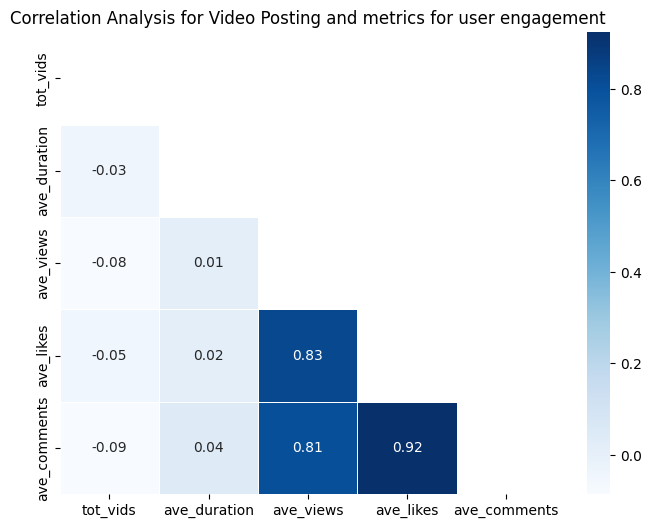

In [30]:
# Select the features you want for the correlation matrix
selected_features = ['tot_vids', 'ave_duration', 'ave_views', 'ave_likes','ave_comments']

# Calculate the correlation matrix for the selected features
correlation_matrix = timeseries_df[selected_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap using seaborn with custom settings
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Analysis for Video Posting and metrics for user engagement')
plt.show()

**Conclusion:**
*   Posting volume does not have a huge effect on viewerbase
*   Duration of videos do not seem to have a huge aggregate effect on viewer behavior

*Next step in the Analysis should occur at the video level*

